<a href="https://colab.research.google.com/github/truongthuanr/transfer/blob/main/08_SSSMarket_truongthuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import seaborn as sns

In [16]:
train_url = "https://raw.githubusercontent.com/truongthuanr/self-project/main/dataset/sss/train.csv"
df = pd.read_csv(train_url)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4705 non-null   int64  
 1   sku                   4705 non-null   int64  
 2   short_description     4640 non-null   object 
 3   price                 4705 non-null   int64  
 4   discount              4705 non-null   int64  
 5   discount_rate         4705 non-null   int64  
 6   rating_average        4705 non-null   float64
 7   review_count          4705 non-null   int64  
 8   order_count           4705 non-null   int64  
 9   favourite_count       4705 non-null   int64  
 10  thumbnail_url         4705 non-null   object 
 11  categories            4705 non-null   object 
 12  liked                 4705 non-null   bool   
 13  rating_summary        4705 non-null   object 
 14  brand                 4705 non-null   object 
 15  current_seller       

In [18]:
df.head()

,id,sku,short_description,price,discount,discount_rate,rating_average,review_count,order_count,favourite_count,thumbnail_url,categories,liked,rating_summary,brand,current_seller,other_sellers,configurable_options,extra_feature,cloth_type
0,0,4777164499549,\n \n- Loại : Quần Thể Thao Đen.\n- Kiểu Dáng ...,99000,101000,51,0.0,0,0,1,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 36387, ""sku"": ""5716562721707"", ""store_i...","[{""id"": 134556, ""name"": ""Mualayeushop"", ""link""...","[{""code"": ""option1"", ""name"": ""Size"", ""position...",[],top_t-shirt_sweatshirt shoe pants
1,1,2931572867679,\nÁo Len Nam Dày Bs33 được may từ chất liệu le...,400000,0,0,0.0,0,0,1,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 10025, ""sku"": ""4689826428364"", ""store_i...",[],"[{""code"": ""option1"", ""name"": ""Màu"", ""position""...",[],sweater
2,2,6427102533481,\n \n- Loại : Quần Âu Thêu Vương Miện\n- Kiểu ...,159000,141000,47,4.5,14,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 9674, ""sku"": ""5288509925221"", ""store_id...",[],"[{""code"": ""option1"", ""name"": ""Size"", ""position...",[],watch shoe shirt_blouse pants
3,3,1590440568400,"Khách vui lòng xem kĩ số đo sản phẩm, hình thậ...",109000,81000,43,4.2,15,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 22226, ""sku"": ""1822886614091"", ""store_i...",[],NaN,[],belt dress bag_wallet shoe
4,4,8690273838961,"sét áo dài cách tân mới chât đẹpsize S,M,Lset ...",290000,160000,36,3.0,3,0,5,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}",NaN,[],"[{""code"": ""option1"", ""name"": ""szie"", ""position...",[],bag_wallet dress shoe


In [19]:
df.thumbnail_url[0]

'https://salt.tikicdn.com/cache/280x280/ts/product/96/e2/3f/d058858d876dd97a6eab9842cdd4d771.jpg'

Total images:

In [20]:
total_images = df.thumbnail_url.notna().sum()
total_images

4705

# Exploratory Data Anaysis

## Label in images

In [26]:
df["cloth_type"] = df.cloth_type.str.split(" ")

In [56]:
labels = df.cloth_type.tolist()
labels = [item if type(item) == list else [str(item)] for item in labels]

In [29]:
all_label = [label for sub in labels for label in sub]

In [60]:
labels_count = Counter(all_label)
# sort by frequency
label_name = [tag for tag,count in labels_count.most_common()]
label_freq = [count for tag,count in labels_count.most_common()]

Encode the label


In [77]:
label_map = {label_name[i]: i for i in range(0,len(label_name))}
inv_label_map = {i:label_name[i] for i in range(0,len(label_name))}

In [79]:
inv_label_map

{0: 'top_t-shirt_sweatshirt',
 1: 'pants',
 2: 'shoe',
 3: 'dress',
 4: 'skirt',
 5: 'shirt_blouse',
 6: 'shorts',
 7: 'watch',
 8: 'bag_wallet',
 9: 'jacket',
 10: 'belt',
 11: 'nan',
 12: 'hat',
 13: 'coat',
 14: 'glasses',
 15: 'sweater',
 16: 'headband_head-covering_hair-accessory',
 17: 'cardigan',
 18: 'jumpsuit',
 19: '',
 20: 'scarf',
 21: 'vest'}

Whichs are the tops used label?

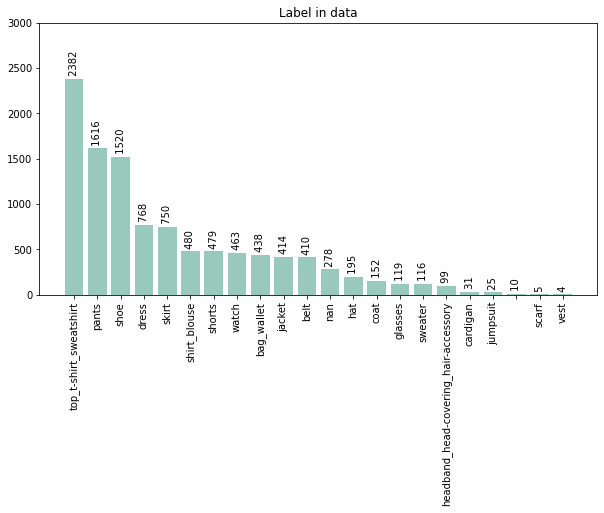

In [61]:
fig = plt.figure(figsize=(10,5))
plt.bar(label_name,label_freq, color="#99C8BC")
plt.title("Label in data")
plt.xticks(rotation=90)
for i, (tag,count) in enumerate(labels_count.most_common()):
  plt.text(i, count, f" {count} ", rotation=90, ha="center", va="bottom", color="black")
plt.ylim(0,3000);


Why is na label?

In [33]:
na_images = df[df.cloth_type.isna() == True].thumbnail_url

## Image

In [47]:
import urllib
from io import StringIO
import requests
from urllib.request import urlopen
from random import randint
from io import BytesIO

In [35]:
images = df.thumbnail_url

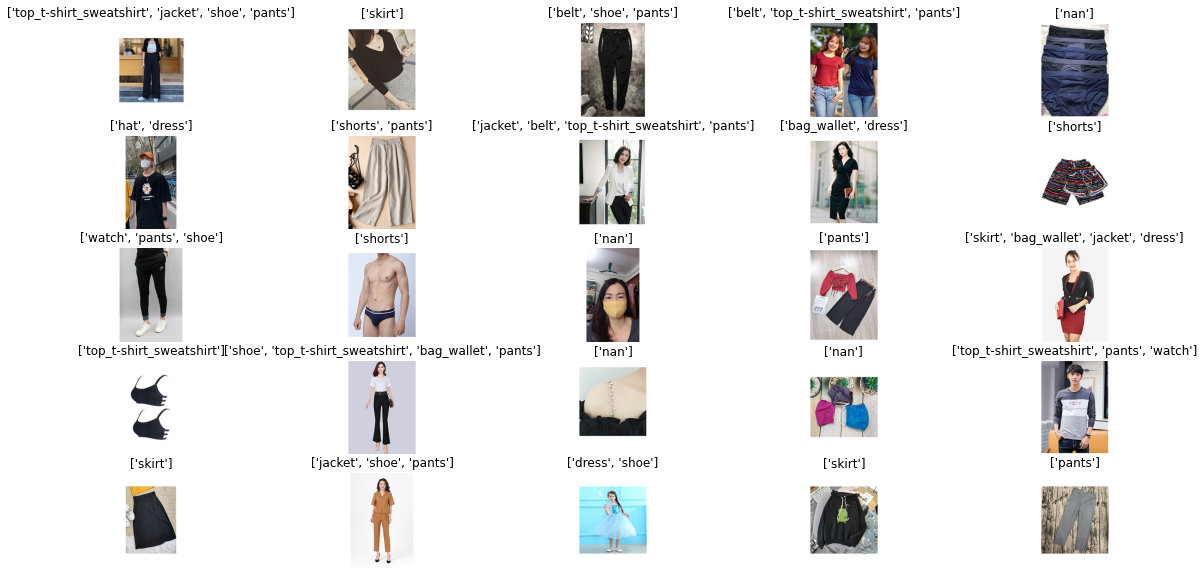

In [66]:
# plot random 25 image
fig = plt.figure(figsize=(20,10))
for i in range(0,25):
  ax = plt.subplot(5,5,i+1)
  _i = randint(0,total_images)
  img = Image.open(urlopen(images[_i]))
  ax = plt.imshow(img)
  plt.title(labels[_i])
  plt.axis("off")